# **Aerofit Project**


# About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.

<br>

# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-03-20 11:08:34--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.129, 13.224.9.181, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 11:08:34 (2.10 GB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



# Basic Analysis

In [ ]:
data = pd.read_csv('aerofit_treadmill.csv?1639992749')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.shape

(180, 9)

From this we can say that we have **180 rows** and **9 columns**

## Statistical analysis of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [ ]:
data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
data['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

# Age Column Analysis

<Axes: xlabel='Age'>

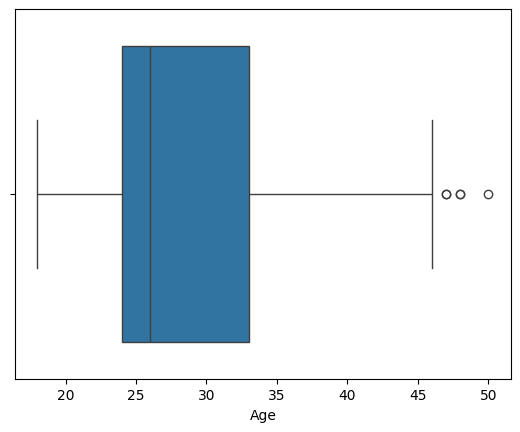

In [ ]:
Age = data['Age']
sns.boxplot(x = Age)

## Finding Outliers in Age


In [ ]:
Q1 = np.percentile(data['Age'],25)
Q2 = np.percentile(data['Age'],50)
Q3 = np.percentile(data['Age'],75)


IQR = (Q3 - Q1).round(2)

W1 = (Q1 - (1.5 * IQR)).round(2)
W2 = (Q3 + (1.5 * IQR)).round(2)

Q1,Q3,W1, W2,IQR

(24.0, 33.0, 10.5, 46.5, 9.0)

In [ ]:
data[(data['Age'] < W1)| (data['Age'] >  W2)]
# sns.boxplot()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
len(data[(data['Age'] < W1)| (data['Age'] > W2 )])

5

There are 5 outliers in age column

In [ ]:
data[(data['Age'] > 20) & (data['Age'] < 40)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
...,...,...,...,...,...,...,...,...,...
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360


In [ ]:
age_distribution = (Age[(Age > 20) & (Age < 40)].count()/len(Age))*100
age_distribution

85.0

## Conclusion :
85% of 85% people buying the product are between the ages of 20 and 40.

## **Age Categories**
Dividing the age into 3 categories
- Young : 18 - 20
- Middle_aged : 20 - 40
- Elderly : 40 - 50

In [ ]:
bins = [17,20,40,50]
labels = ['Young','Middle_aged','Elderly']
data['Generation'] = pd.cut(data['Age'],bins = bins,labels = labels)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Generation
0,KP281,18,Male,14,Single,3,4,29562,112,Young
1,KP281,19,Male,15,Single,2,3,31836,75,Young
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young
3,KP281,19,Male,12,Single,3,3,32973,85,Young
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle_aged
176,KP781,42,Male,18,Single,5,4,89641,200,Elderly
177,KP781,45,Male,16,Single,5,5,90886,160,Elderly
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elderly


In [ ]:
data['Generation'].value_counts()

Middle_aged    158
Elderly         12
Young           10
Name: Generation, dtype: int64

**Note :**
- We divided the customers into 3 categories based on their ages and added a new column to the data frame specifying the basket they fall into.
- We did this for analyzing the age according to the category.

# Gender Column Analysis

In [ ]:
gender_distribution = data['Gender']
gender_distribution

0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
175      Male
176      Male
177      Male
178      Male
179      Male
Name: Gender, Length: 180, dtype: object

In [ ]:
gender_distribution.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
gender_distribution.value_counts(normalize = True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

### Conclusion:
Aerofit has 57.78% male customers and 42.22% female customers.

# Martial status Column Analysis

In [ ]:
marital_status_distribution = data['MaritalStatus']
marital_status_distribution

0         Single
1         Single
2      Partnered
3         Single
4      Partnered
         ...    
175       Single
176       Single
177       Single
178    Partnered
179    Partnered
Name: MaritalStatus, Length: 180, dtype: object

In [ ]:
marital_status_distribution.unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
marital_status_distribution.nunique()

2

In [ ]:
marital_status_distribution.value_counts(normalize = True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

### Conclusion:
59.4% of Aerofit customers are married, while remaining 40.56% are single.

# Income group Column Analysis

In [ ]:
income_distribution = data['Income']
income_distribution

0       29562
1       31836
2       30699
3       32973
4       35247
        ...  
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, Length: 180, dtype: int64

In [ ]:
income_distribution.value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

<Axes: xlabel='Income'>

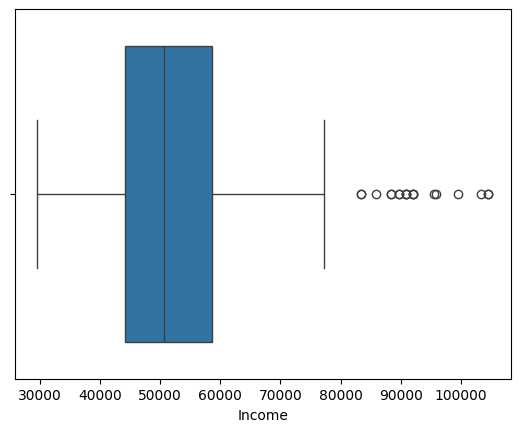

In [ ]:
sns.boxplot(x = income_distribution)

## Finding Outliers in Income

In [ ]:
Q1 = np.percentile(income_distribution,25)
Q2 = np.percentile(income_distribution,50)
Q3 = np.percentile(income_distribution,75)

IQR = Q3-Q1

W1 = Q1 - 1.5*IQR
W2 = Q2 + 1.5*IQR

Q1,Q2,Q3,W1,W2,IQR

(44058.75, 50596.5, 58668.0, 22144.875, 72510.375, 14609.25)

In [ ]:
data[(data['Income'] < W1) | (data['Income'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Generation
155,KP781,25,Male,18,Partnered,6,5,75946,240,Middle_aged
156,KP781,25,Male,20,Partnered,4,5,74701,170,Middle_aged
159,KP781,27,Male,16,Partnered,4,5,83416,160,Middle_aged
160,KP781,27,Male,18,Single,4,3,88396,100,Middle_aged
161,KP781,27,Male,21,Partnered,4,4,90886,100,Middle_aged
162,KP781,28,Female,18,Partnered,6,5,92131,180,Middle_aged
163,KP781,28,Male,18,Partnered,7,5,77191,180,Middle_aged
164,KP781,28,Male,18,Single,6,5,88396,150,Middle_aged
166,KP781,29,Male,14,Partnered,7,5,85906,300,Middle_aged
167,KP781,30,Female,16,Partnered,6,5,90886,280,Middle_aged


In [ ]:
len(data[(data['Income'] < W1) | (data['Income'] > W2)])

22

## Income Categories

Adding an addtional column for dividing the customers based on their income into 3 categories

- Cat1 : W1 - Q1
- Cat2 : Q1 - Q3
- Cat3 : Q3 - W2

In [ ]:
bins = [-float('inf'),Q1,Q3,float('inf')]
labels = ['Category1','Category2','Category3']
data['Income_Group'] = pd.cut(data['Income'],bins = bins,labels = labels)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Generation,Income_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Category1
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Category1
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Category1
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Category1
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Category1
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle_aged,Category3
176,KP781,42,Male,18,Single,5,4,89641,200,Elderly,Category3
177,KP781,45,Male,16,Single,5,5,90886,160,Elderly,Category3
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elderly,Category3


In [ ]:
data['Income_Group'].value_counts()

Category2    90
Category1    45
Category3    45
Name: Income_Group, dtype: int64

**Note :**
- We also categorised customers according to their incomes into 3 categories which helps in our further analysis and we added a seperate column to specify this.

# Miles Column Analysis

In [ ]:
miles_distribution = data['Miles']
miles_distribution

0      112
1       75
2       66
3       85
4       47
      ... 
175    200
176    200
177    160
178    120
179    180
Name: Miles, Length: 180, dtype: int64

In [ ]:
miles_distribution.value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

## Finding Outliers in Miles

In [ ]:
Q1 = np.percentile(miles_distribution,25)
Q2 = np.percentile(miles_distribution,50)
Q3 = np.percentile(miles_distribution,75)

IQR = Q3-Q1

W1 = Q1-1.5*IQR
W2 = Q3+1.5*IQR

Q1,Q2,Q3,W1,W2,IQR

(66.0, 94.0, 114.75, -7.125, 187.875, 48.75)

In [ ]:
data[(data['Miles'] < W1) | (data['Miles'] > W2)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Generation,Income_Group
23,KP281,24,Female,16,Partnered,5,5,44343,188,Middle_aged,Category2
84,KP481,21,Female,14,Partnered,5,4,34110,212,Middle_aged,Category1
142,KP781,22,Male,18,Single,4,5,48556,200,Middle_aged,Category2
148,KP781,24,Female,16,Single,5,5,52291,200,Middle_aged,Category2
152,KP781,25,Female,18,Partnered,5,5,61006,200,Middle_aged,Category3
155,KP781,25,Male,18,Partnered,6,5,75946,240,Middle_aged,Category3
166,KP781,29,Male,14,Partnered,7,5,85906,300,Middle_aged,Category3
167,KP781,30,Female,16,Partnered,6,5,90886,280,Middle_aged,Category3
170,KP781,31,Male,16,Partnered,6,5,89641,260,Middle_aged,Category3
171,KP781,33,Female,18,Partnered,4,5,95866,200,Middle_aged,Category3


In [ ]:
len(data[(data['Miles'] < W1) | (data['Miles'] > W2)])

13

## Conclusion
* There are a total of 13 outliers in the miles column.
* This indidcates that data to analyse customers based on the number of miles they run per week is spread within the remaining 167 customers.

<Axes: xlabel='Miles'>

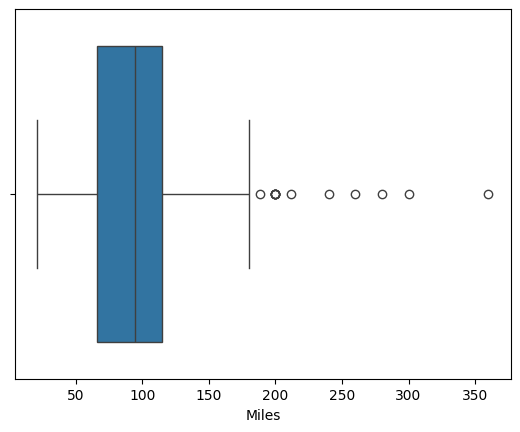

In [ ]:
sns.boxplot(x = miles_distribution)

# Missing Value Detection


In [ ]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Generation       0
Income_Group     0
dtype: int64

## Conclusion
There are no null values present in the given data

# **Univariate Analysis**

## Categorical

### Distribution of Gender among Aerofit Customers

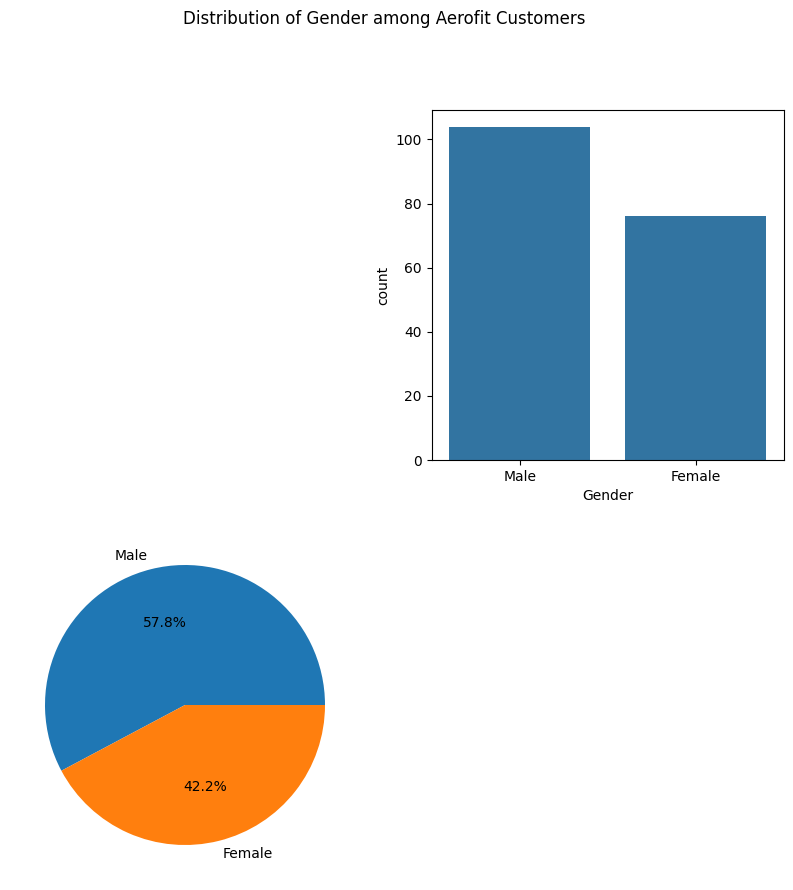

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.countplot(data,x = data['Gender'])

plt.suptitle('Distribution of Gender among Aerofit Customers')
plt.subplot(2,2,3)
plt.pie(data['Gender'].value_counts(normalize = True)*100,labels = data['Gender'].unique(),autopct='%1.1f%%')
plt.show()

#### Insights :
Aerofit has 57.8% male customers and 42.2% female customers.

**Recommendation:**
- Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.

- Showcase the female-friendly features and benefits of Aerofit treadmills to attract female customers.

- Offer a diverse selection of treadmill models that cater to various fitness levels and preferences.

### Distribution of Treadmills among Aerofit customers

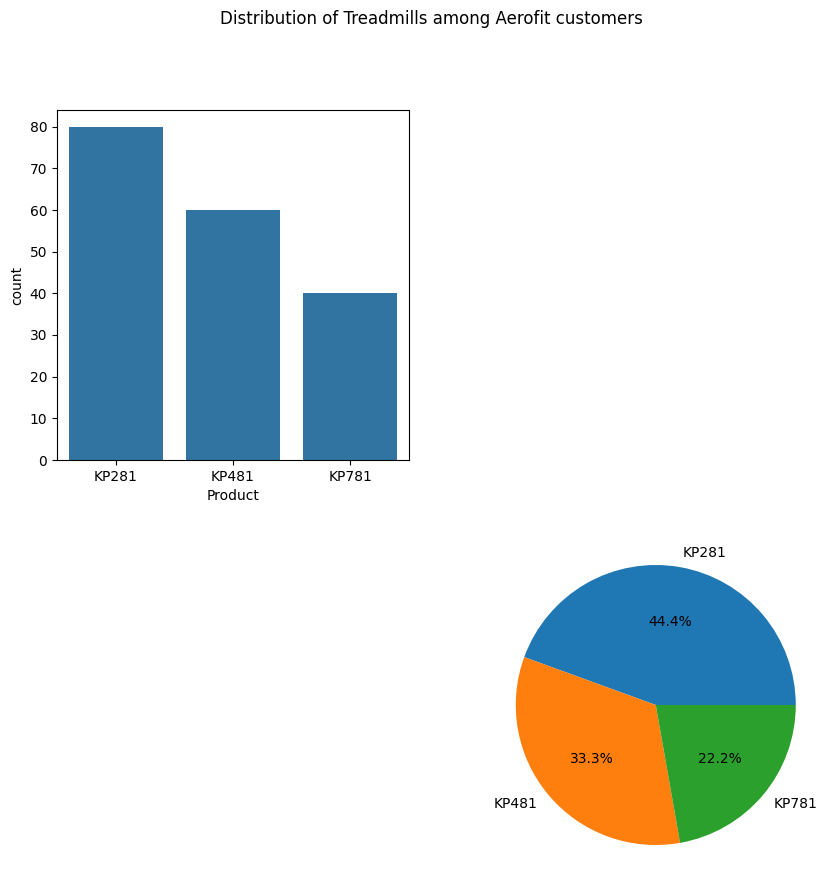

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,4)
plt.pie(data['Product'].value_counts(normalize = True)*100, labels = data['Product'].unique(),autopct = '%1.1f%%')

plt.suptitle('Distribution of Treadmills among Aerofit customers')
plt.subplot(2,2,1)
sns.countplot(data,x = data['Product'])
plt.show()

#### Insights

- Among the users, 44.44% prefer using the KP281 treadmill, while 33.3% opt for the KP481 and 22.2% opt for KP781 treadmill.
- KP281 is preffered by most of the customers because of being the entry level and affordable one.
- KP481 is ideal for mid-level runners and it's excellent value-for-money offering.
- KP781 is more advanced and costlier than other 2 options, chosen by only 22.2 % customers.

#### Recommendations:

1. Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.

2. Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.

3. Provide special offers or discounts to further entice customers looking for a cost-effective option.

### Distribution of Martial status among Aerofit customers

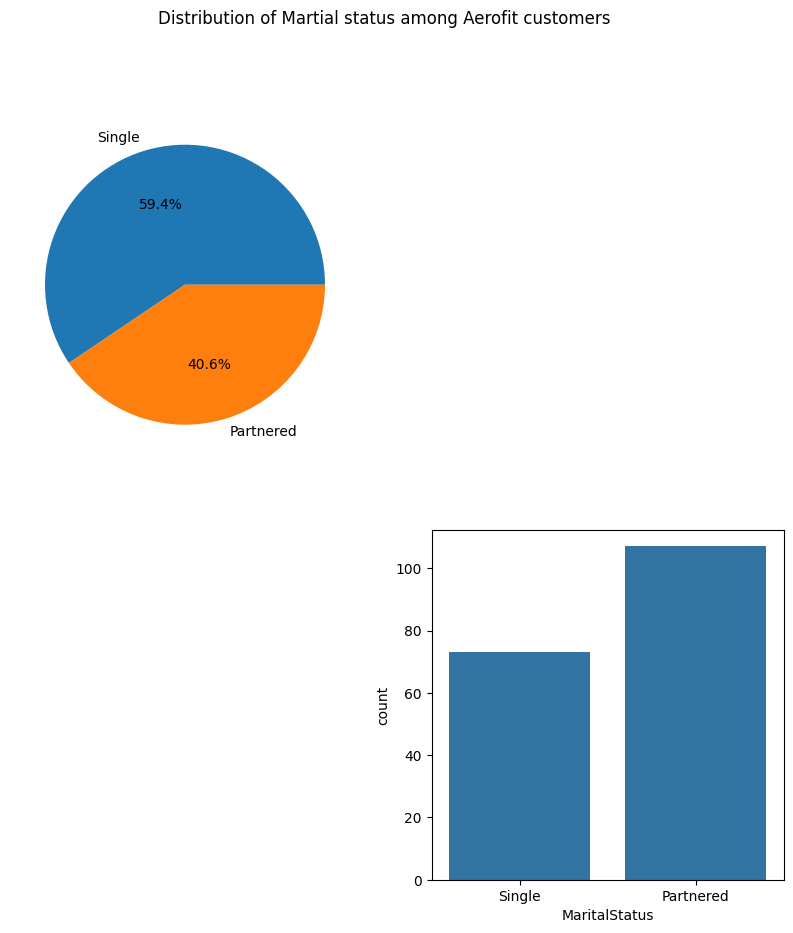

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.pie(data['MaritalStatus'].value_counts(normalize=True) * 100, labels=data['MaritalStatus'].unique(), autopct='%1.1f%%')

plt.suptitle('Distribution of Martial status among Aerofit customers')

plt.subplot(2,2,4)
sns.countplot(data,x = data['MaritalStatus'])
plt.show()

#### Insights :
59.9% of AEROFIT users are married, while 40.56% of them are single.

### Distribution of Income group among Aerofit Customers

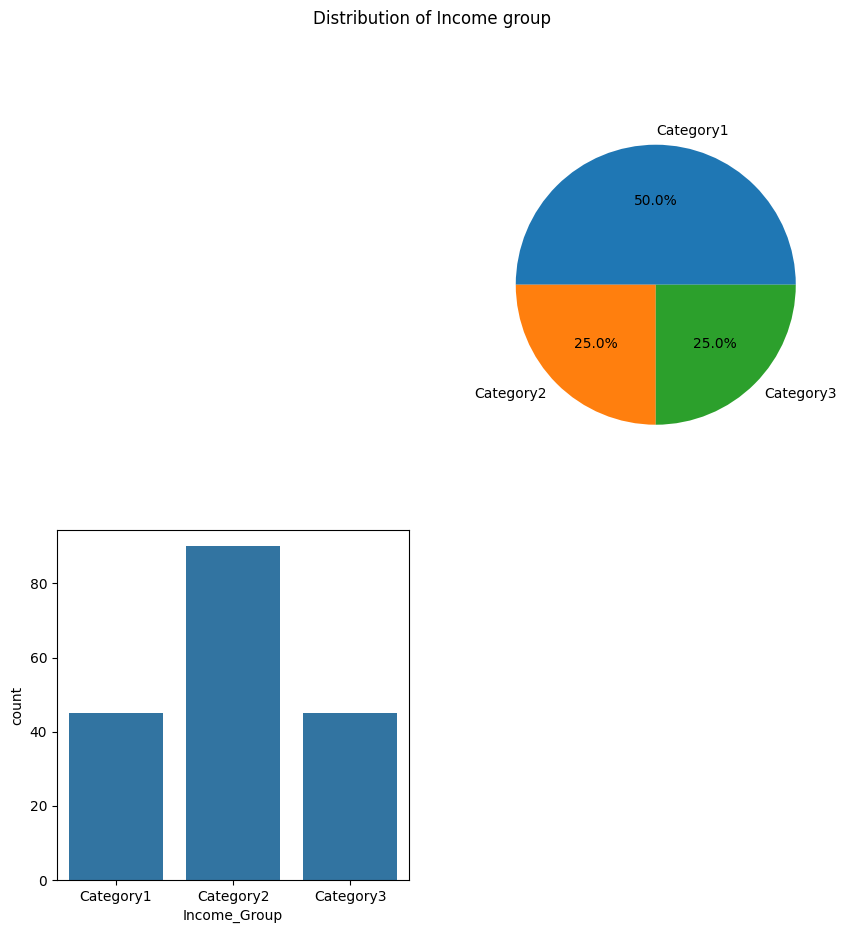

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Income_Group')
plt.suptitle('Distribution of Income group')

plt.subplot(2, 2, 2)
plt.pie(data['Income_Group'].value_counts(normalize=True) * 100, labels=data['Income_Group'].unique(), autopct='%1.1f%%')

plt.show()


#### Insights:
- 50% of the users falls under the category2 ,i.e, mid income customers.
- 25% them are high incomed and remaning 25% of them are low incomed customers.

**Recommendation :**
- Showcase the advanced features and premium quality of KP781 treadmill, catering to the discerning needs of high-income customers.
- Highlight how the KP781 enhances their fitness experience with edge-cutting technology and superioir performance.


### Distribution of Age group among Aerofit Customers

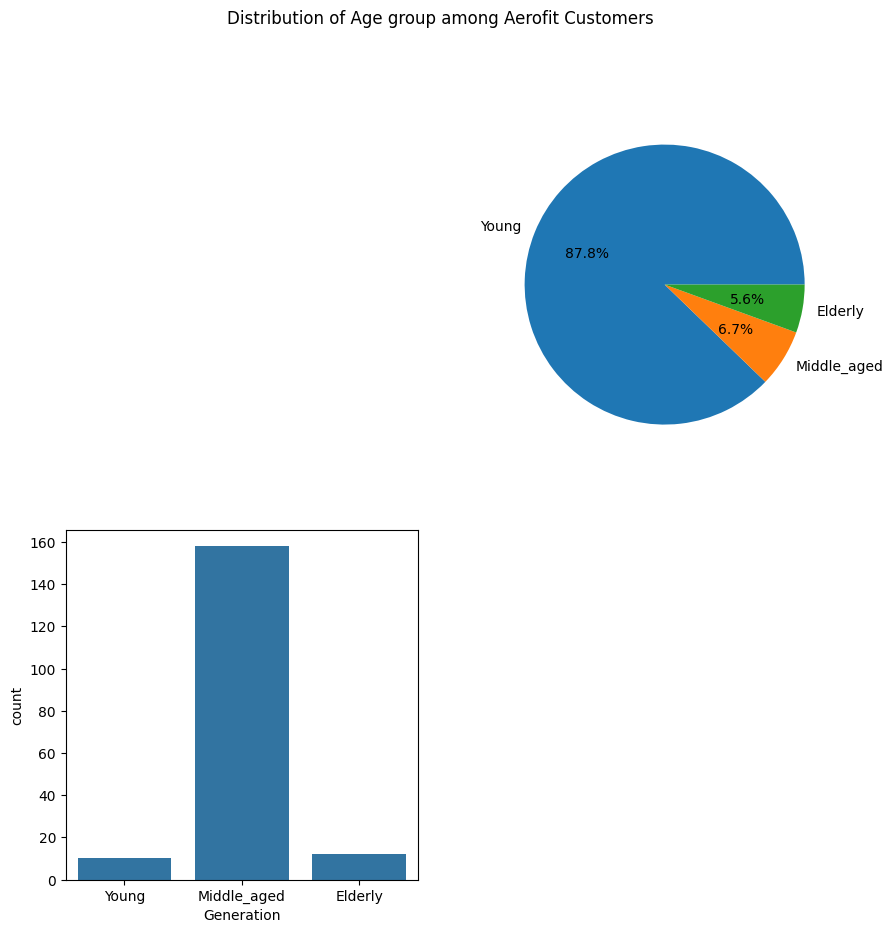

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Generation')
plt.suptitle('Distribution of Age group among Aerofit Customers')

plt.subplot(2, 2, 2)
plt.pie(data['Generation'].value_counts(normalize=True) * 100, labels=data['Generation'].unique(), autopct='%1.1f%%')

plt.show()


#### Insights :
- Most of the Aerofit users fall under young age-group.
- 6.7% of them are middle-aged users.
- 5.6% of them are old-aged users.

**Reccomendations :**
Offer personalized assistance to help customers aged 40-50 select the ideal treadmll model, providing them with the tootls to maintain an active and healthy life-style.

## Numerical

### Distribution of Age among Aerofit Customers



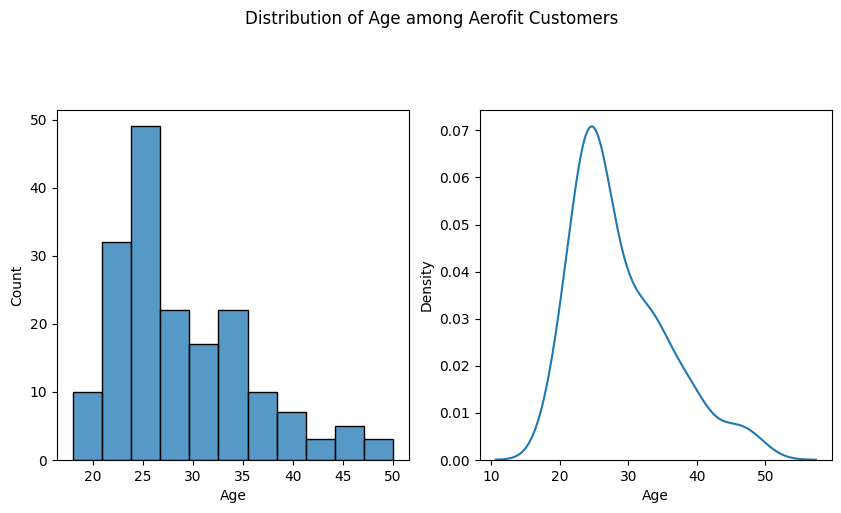

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data,x = 'Age')
plt.suptitle('Distribution of Age among Aerofit Customers')
plt.subplot(2,2,2)
sns.kdeplot(data,x = 'Age',legend = True)
plt.show()

#### Insights :

- The majority of Aerofit customers belong to the age group of 20-40 and there is a high probability of them purchasing Aerofit treadmills.
- There are very few users in the age 40-50, abd the probability of them buying the Aerofit treadmills is significantly low.

### Distribution of Income among Aerofit Customers

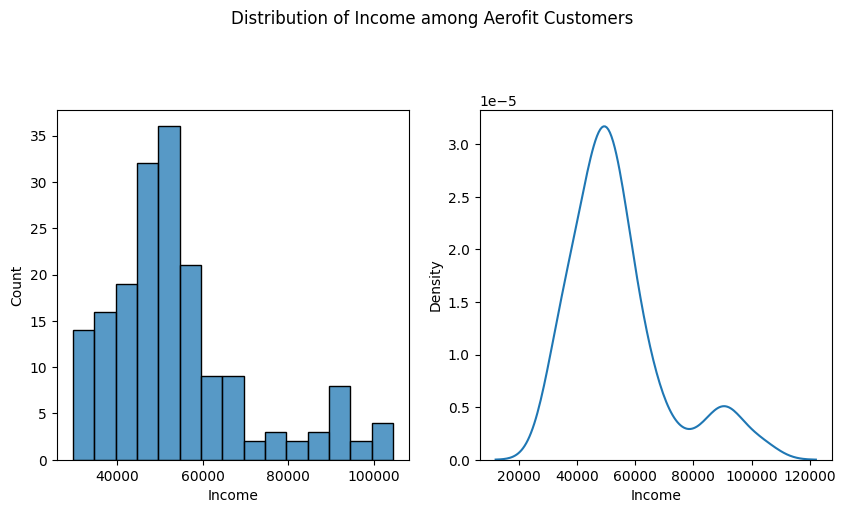

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data,x = 'Income')
plt.suptitle('Distribution of Income among Aerofit Customers')
plt.subplot(2,2,2)
sns.kdeplot(data,x = 'Income',legend = True)
plt.show()

#### Insights :

- Majority if the customers fall under income range of 40000 - 70000, and there is a high probability of them purchasing Aerofit treadmills.
- Customers with income greater than 80000 have very less chanes for buying a treadmill.

### Distribution of Education among Aerofit Customers

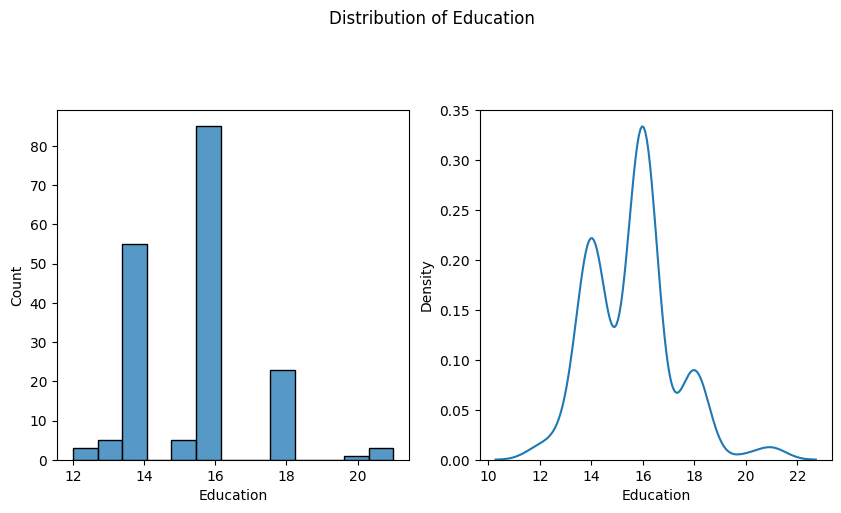

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data,x = 'Education')
plt.suptitle('Distribution of Education')
plt.subplot(2,2,2)
sns.kdeplot(data,x = 'Education',legend = True)
plt.show()

#### Insights :  
- Customers with 16 years of education are the primary purchasers of Aerofit treadmills.
- Customers with education greater than 18 years have a significantly lower probability of purchasing the Aerofit treadmills.

### Distribution of Fitness Levels among Aerofit Customers

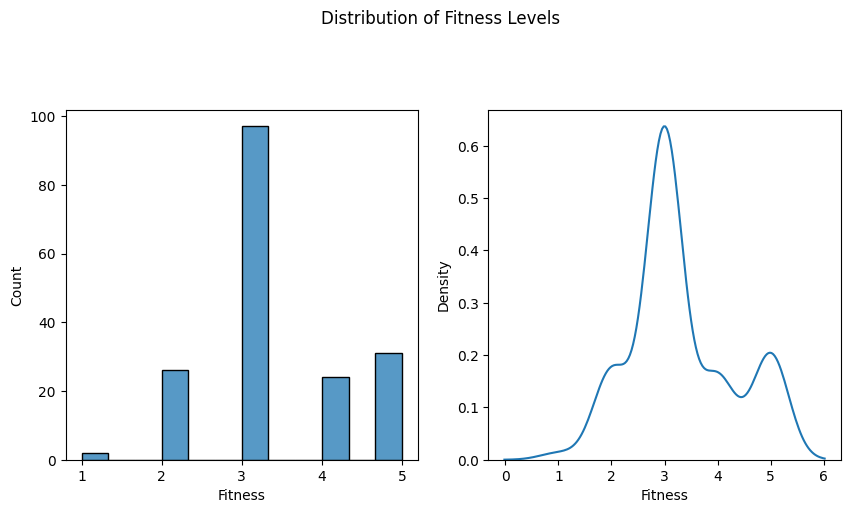

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data,x = 'Fitness')
plt.suptitle('Distribution of Fitness Levels')
plt.subplot(2,2,2)
sns.kdeplot(data,x = 'Fitness',legend = True)
plt.show()

#### Insights :   
The majority of Aerofit customers possess fitness level 3, which aligns with a high likelihood of them purchasing treadmills.

### Distribution of Usage among Aerofit Customers



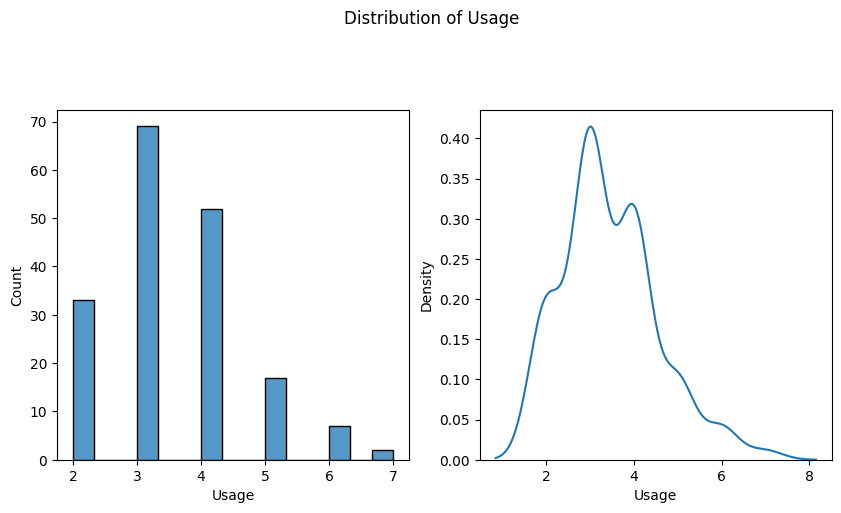

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data,x = 'Usage')
plt.suptitle('Distribution of Usage')
plt.subplot(2,2,2)
sns.kdeplot(data,x = 'Usage',legend = True)
plt.show()

#### Insights :  
- The majority of the customers use treadmills 3 times a week, indicating a higher probability of them purchasing a treadmill from Aerofit.

### Distribution of Miles among Aerofit Customers

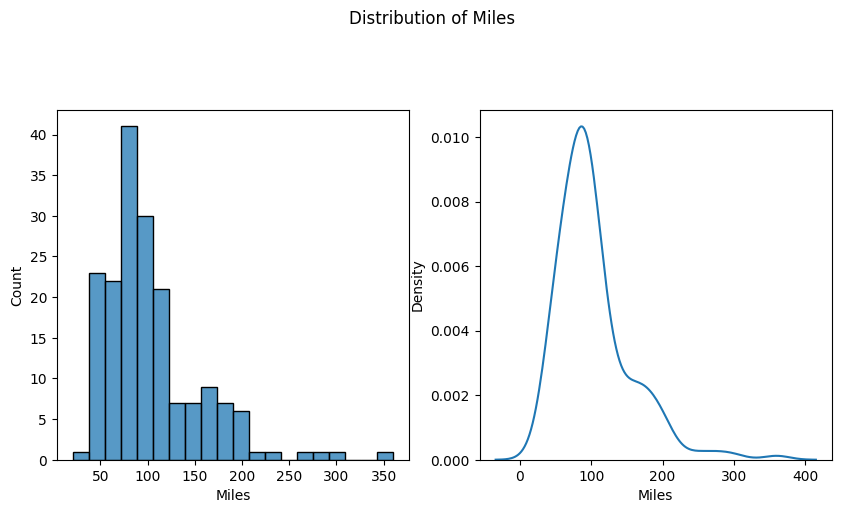

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(data,x = 'Miles')
plt.suptitle('Distribution of Miles')
plt.subplot(2,2,2)
sns.kdeplot(data,x = 'Miles',legend = True)
plt.show()

#### insights :    
- Customers who run 90 - 100 miles per week show a preference for using Aerofit treadmills.
- Hardcore runners, averaging 200-250 miles per week, tend to prefer jogging over using Aerofit treadmills.


# Bivariate Analysis

## Distribution of gender across each Treadmill

<Axes: xlabel='Gender', ylabel='count'>

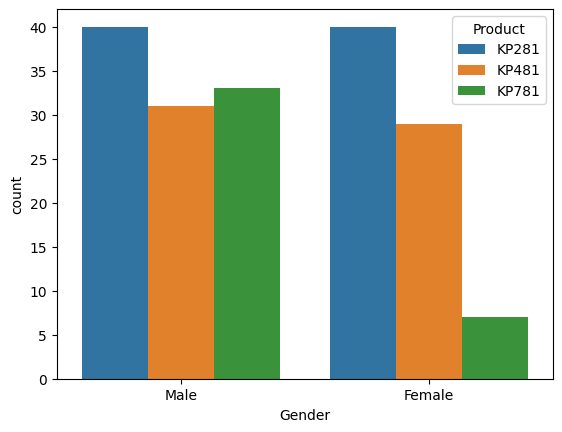

In [ ]:
sns.countplot(data,x = data['Gender'],hue = data['Product'])

<Axes: xlabel='Gender', ylabel='count'>

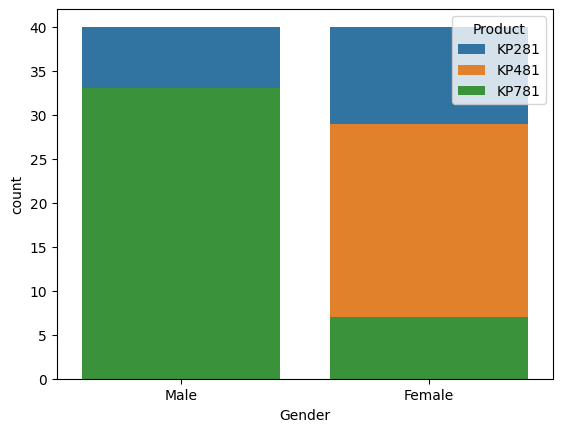

In [ ]:
sns.countplot(data,x = 'Gender', hue = 'Product',dodge = False)

#### **Insights:**

- The distribution of products among male and female customers is relatively similar, with a slight preference for KP281 among both genders.
- Female customers show a slightly higher preference for KP481 compared to male customers.
- KP781 has a lower customer base among both genders, indicating a need to enhance its appeal or target specific customer segments.

**Recommendations:**

- Conduct targeted marketing campaigns to highlight the features of KP481 and KP781 that cater to the preferences of female customers.
- Analyze customer feedback and reviews to understand why KP781 has a lower customer base and address any potential issues or misconceptions.
- Consider offering bundle packages or discounts to encourage customers to upgrade to higher-end models like KP781.

In [ ]:
female_data = data[data['Gender'] == 'Female']
male_data = data[data['Gender'] == 'Male']

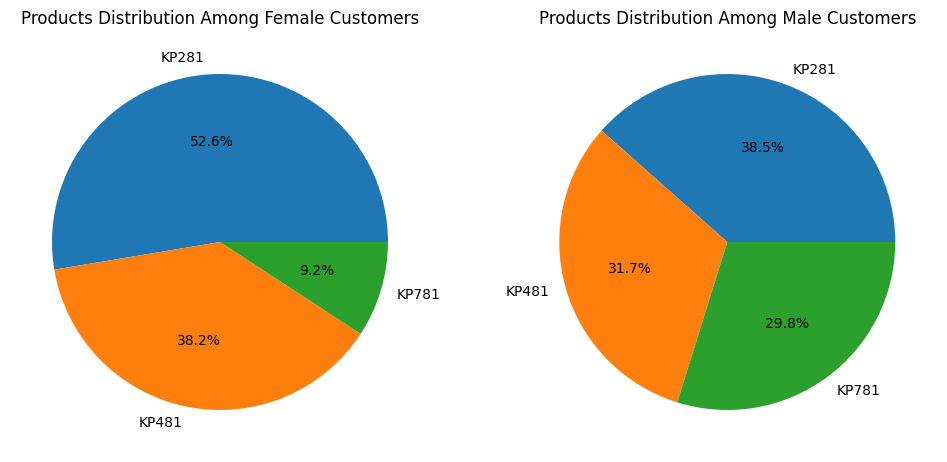

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.pie(female_data['Product'].value_counts(normalize=True)*100, labels=female_data['Product'].unique(), autopct='%1.1f%%')
plt.title('Products Distribution Among Female Customers')

# Plot for male_data
plt.subplot(2, 2, 2)
plt.pie(male_data['Product'].value_counts(normalize=True)*100, labels=male_data['Product'].unique(), autopct='%1.1f%%')
plt.title('Products Distribution Among Male Customers')

plt.show()


####Insights :    
- **Female Customers:**
  - KP281: 45.3%
  - KP481: 37.8%
  - KP781: 16.9%

- **Male Customers:**
  - KP281: 43.5%
  - KP481: 29.1%
  - KP781: 27.4%

**Insights:**

- Both male and female customers have a strong preference for the KP281 model.
- Female customers show a higher preference for the KP481 model compared to male customers.
- Male customers have a higher preference for the KP781 model compared to female customers.

**Recommendations:**

- Aerofit should focus on marketing the KP481 model to female customers to increase its popularity in this segment.
- The company should analyze the reasons behind the higher preference for the KP781 model among male customers and leverage these insights to target this segment more effectively.
- Aerofit could consider offering customized promotions or discounts for specific products to encourage customers to try different models and explore the brand's offerings.

## Distribution of Martial Status among customers who purchased each treadmill

<Axes: xlabel='MaritalStatus', ylabel='count'>

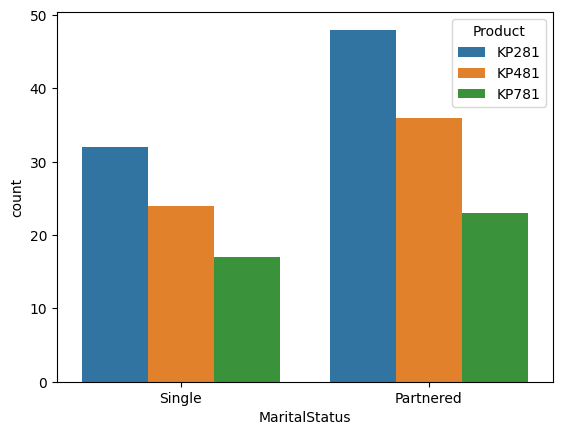

In [ ]:
sns.countplot(data,x = data['MaritalStatus'],hue = data['Product'])

<Axes: xlabel='MaritalStatus', ylabel='count'>

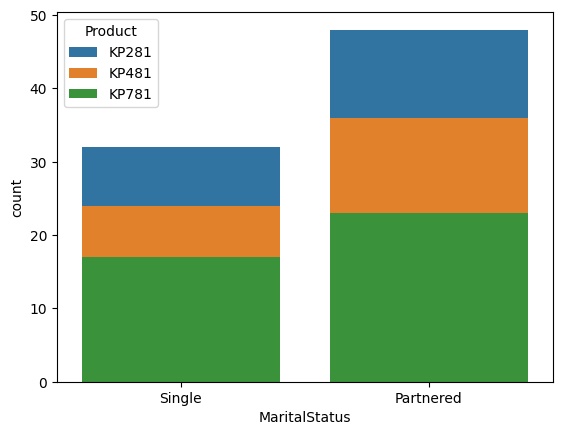

In [ ]:
sns.countplot(data,x = 'MaritalStatus', hue = 'Product',dodge = False)

#### Insights :    
- Married customers have higher frequency of purchasing all the treadmills compared ti customers.
- The trend observed among both married and single customers reflects that KP281 being an entry level and very budget friendly, it became the most purchased one, while KP781, due to it's higher cost, remains the least popular choice for both customer groups.

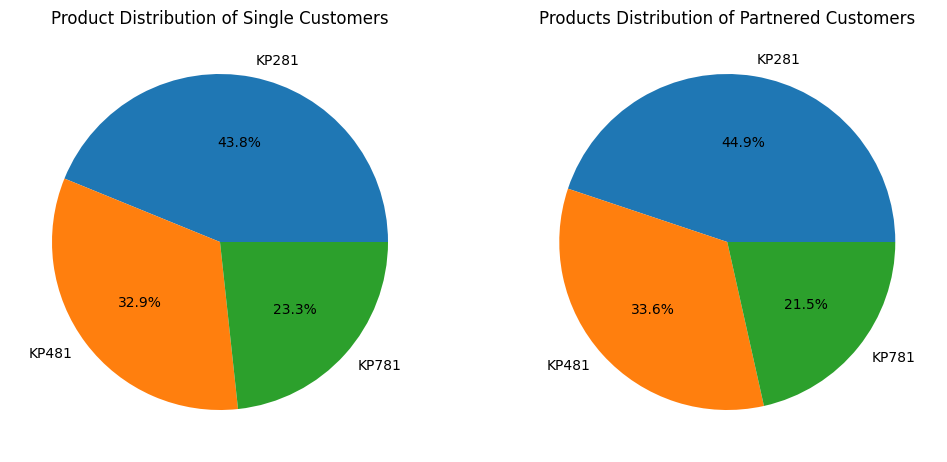

In [ ]:
Single_data = data[data['MaritalStatus'] == 'Single']
Partnered_data = data[data['MaritalStatus'] == 'Partnered']
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.pie(Single_data['Product'].value_counts(normalize=True)*100, labels=Single_data['Product'].unique(), autopct='%1.1f%%')
plt.title('Product Distribution of Single Customers')

# Plot for male_data
plt.subplot(2, 2, 2)
plt.pie(Partnered_data['Product'].value_counts(normalize=True)*100, labels=Partnered_data['Product'].unique(), autopct='%1.1f%%')
plt.title('Products Distribution of Partnered Customers')  # Add subtitle for male_data

plt.show()


#### Insights :   
- Among the married customers, the purchase distribution is : 44.9% prefer KP281, 33.6% prefer KP481 and the remaining 21.7% prefer KP781.
- Among the single customers , the purchase distribution is : 43.8% prefer KP281, 32.9% prefer KP481, and the remaining 23.3% prefer KP781.

## Distribution of Age group for each Treadmill

In [ ]:
Young_cust = data[data['Generation'] == 'Young']
Mid_aged_cust = data[data['Generation'] == 'Middle_aged']
Old_aged_cust = data[data['Generation'] == 'Elderly']

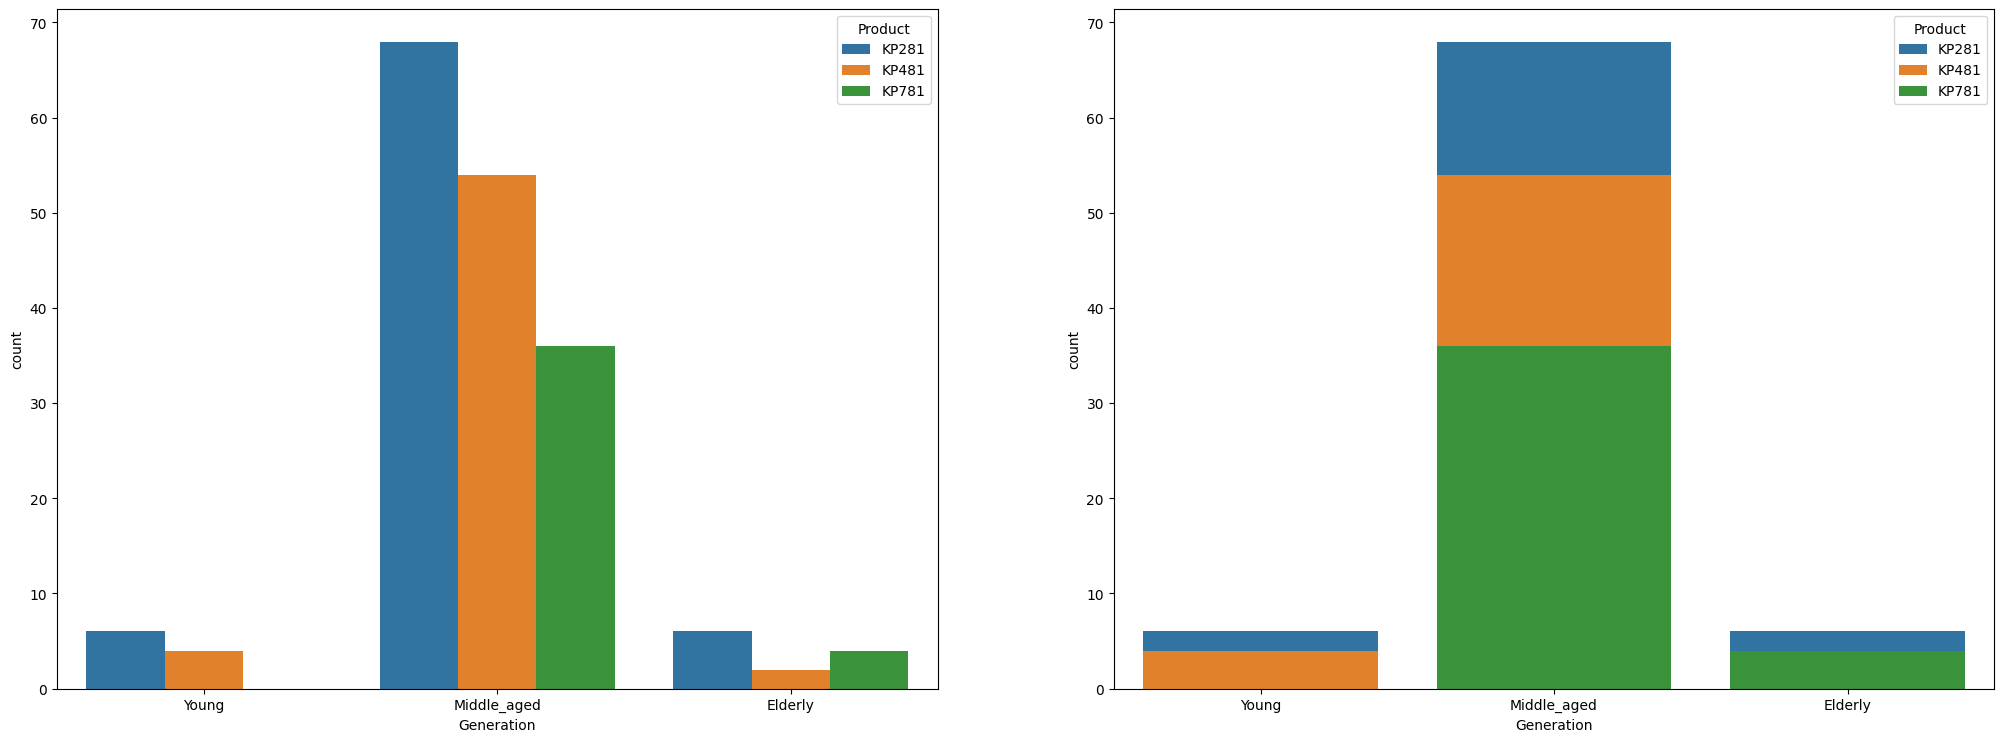

In [ ]:
plt.figure(figsize=(25, 30))

# Subplot 1: Countplot for all generations with dodge
plt.subplot(3, 2, 1)
sns.countplot(data=data, x='Generation', hue='Product')

# Subplot 2: Countplot for all generations without dodge
plt.subplot(3, 2, 2)
sns.countplot(data=data, x='Generation', hue='Product', dodge=False)

plt.show()


#### Insights :     
- Majority of the customer fall in the mid_aged category (20 - 40).
- Majority of the mid-aged users chose KP281 as it is and entry level option.
- Among the young and old aged also KP281 is the preffered one.

Text(0.5, 1.0, 'PRODUCT DISTRIBUTION AMONG THE HIGH_INCOME CUSTOMERS (40 - MAX_AGE)')

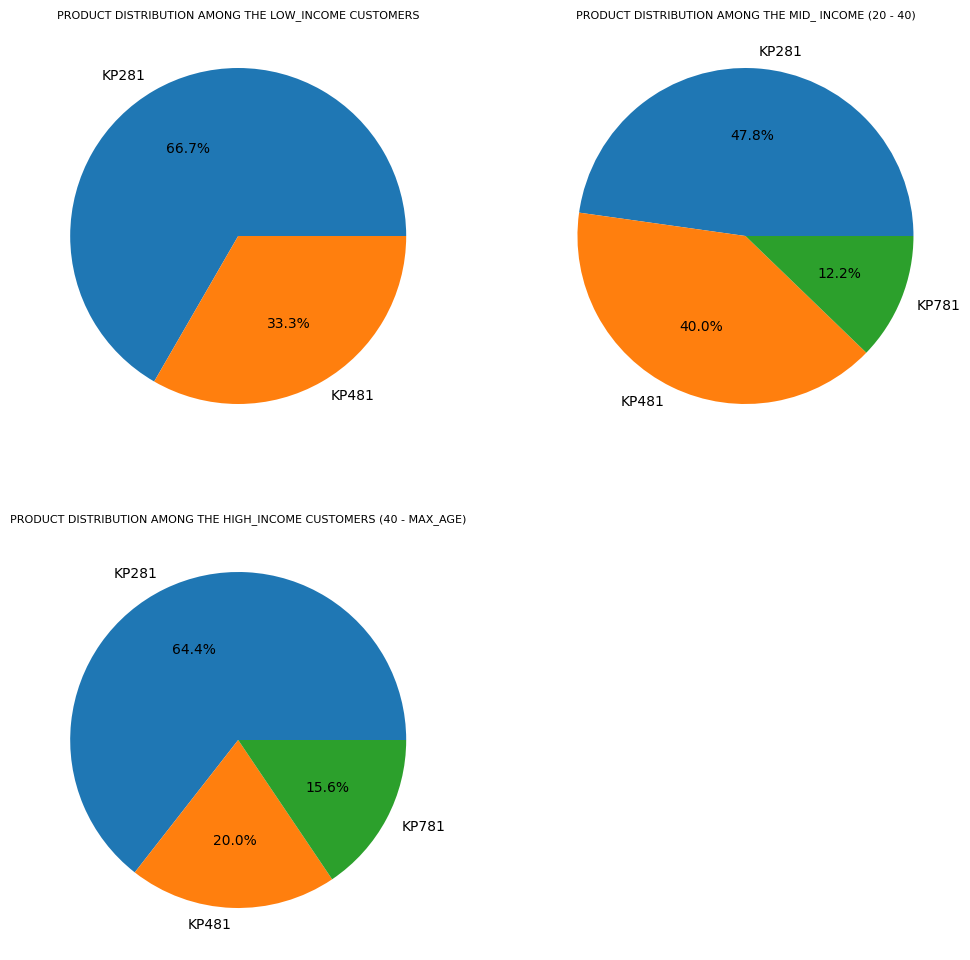

In [ ]:
plt.figure(figsize = (12,12))

# Subplot 1: Pie chart for young customers
plt.subplot(2, 2, 1)
plt.pie(low_income['Product'].value_counts(normalize=True)*100, labels=low_income['Product'].unique(), autopct='%1.1f%%')
plt.title('PRODUCT DISTRIBUTION AMONG THE LOW_INCOME CUSTOMERS',fontsize = 8)

# Subplot 2: Pie chart for mid-aged customers
plt.subplot(2, 2, 2)
plt.pie(mid_income['Product'].value_counts(normalize=True)*100, labels=mid_income['Product'].unique(), autopct='%1.1f%%')
plt.title('PRODUCT DISTRIBUTION AMONG THE MID_ INCOME (20 - 40)',fontsize = 8)

# Subplot 3: Pie chart for old-aged customers
plt.subplot(2, 2, 3)
plt.pie(high_income['Product'].value_counts(normalize=True)*100, labels=high_income['Product'].unique(), autopct='%1.1f%%')
plt.title('PRODUCT DISTRIBUTION AMONG THE HIGH_INCOME CUSTOMERS (40 - MAX_AGE)',fontsize = 8)


#### Insights:      
- Among young users, 60% of them purchased KP281 and remaining 40% purchased KP481 and none of them chose KP781.
- Among the middle aged customers 43% chose KP281, 34.2% chose KP481 and the remaining 22.8% chose KP781.
- Among the old aged customers, 50% chose KP281, 33.3% chose KP481 and remaining 16.7% chose KP781 .

## Distribution of Income-group across Treadmills

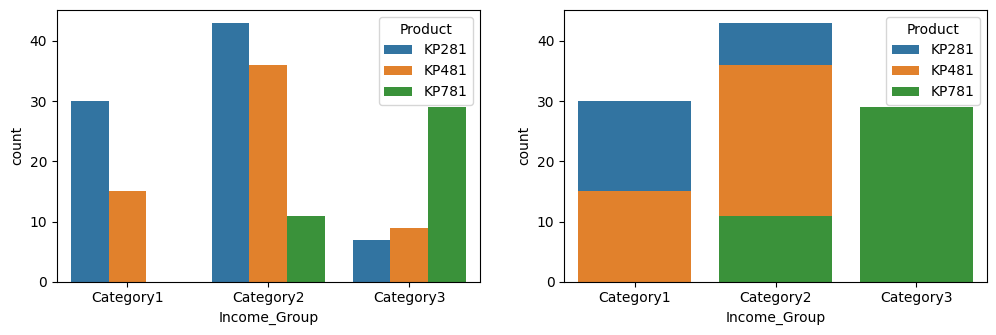

In [ ]:
low_income = data[data['Income_Group'] == 'Category1']
mid_income = data[data['Income_Group'] == 'Category2']
high_income = data[data['Income_Group'] == 'Category3']

plt.figure(figsize=(12, 12))

# Subplot 1: Cor all generations with dodge
plt.subplot(3, 2, 1)
sns.countplot(data=data, x='Income_Group', hue='Product')

# Subplot 2: Countplot for all generations without dodge
plt.subplot(3, 2, 2)
sns.countplot(data=data, x='Income_Group', hue='Product', dodge=False)

plt.show()


#### Insights :     
- Customers belonging to category2 are the majority people to buy Aerofit products.
- Customers belonging to low income group prefer KP281 due to it's affordability. Additionally, nearly 15 customers bought KP481 and none of them bought KP781.
- Customers belonging to middle income group prefer KP281 the most, then KP481 and then KP781.
- Customers nelonging to the high income groups prefer
KP781 the most and then KP481 and then KP281. Most of them chose KP781, as they might felt KP781 as the premium one and because of the features in it.

In [ ]:
data['Income_Group'].unique()

['Category1', 'Category2', 'Category3']
Categories (3, object): ['Category1' < 'Category2' < 'Category3']

Text(0.5, 1.0, 'PRODUCT DISTRIBUTION AMONG THE HIGH_INCOME CUSTOMERS (40 - MAX_AGE)')

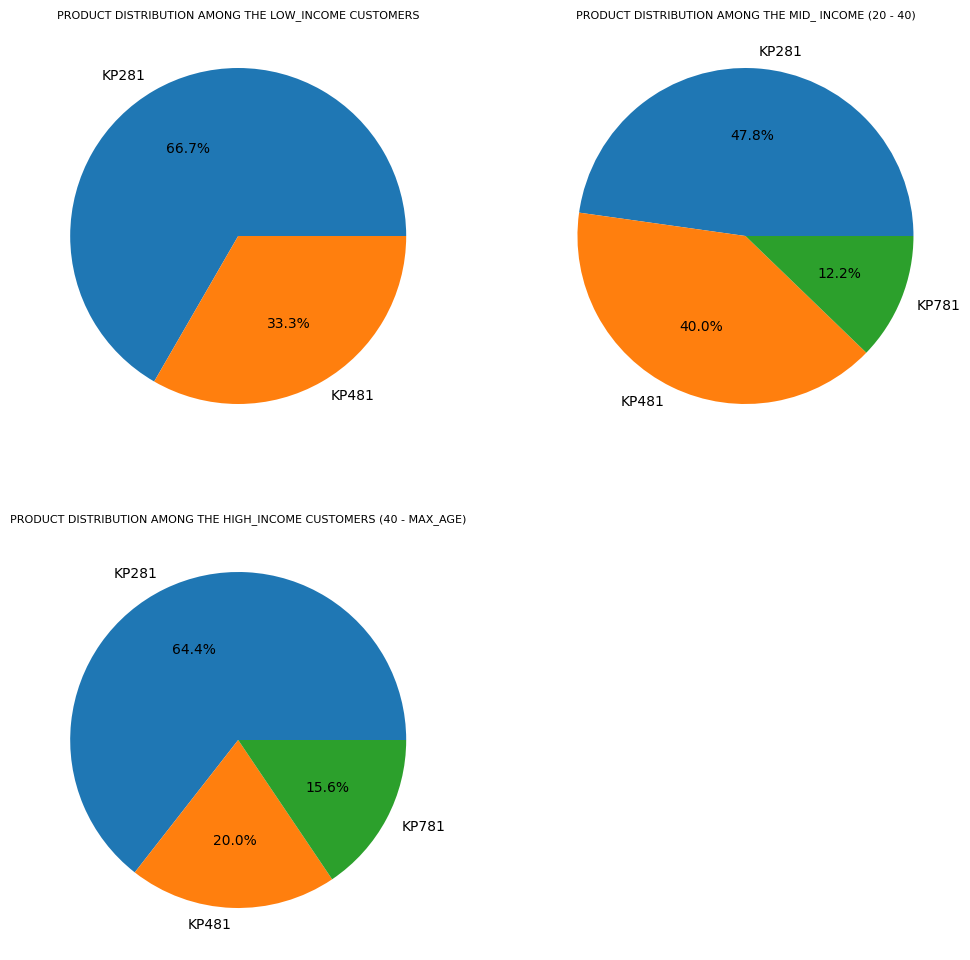

In [ ]:
plt.figure(figsize = (12,12))

# Subplot 1: Pie chart for young customers
plt.subplot(2, 2, 1)
plt.pie(low_income['Product'].value_counts(normalize=True)*100, labels=low_income['Product'].unique(), autopct='%1.1f%%')
plt.title('PRODUCT DISTRIBUTION AMONG THE LOW_INCOME CUSTOMERS',fontsize = 8)

# Subplot 2: Pie chart for mid-aged customers
plt.subplot(2, 2, 2)
plt.pie(mid_income['Product'].value_counts(normalize=True)*100, labels=mid_income['Product'].unique(), autopct='%1.1f%%')
plt.title('PRODUCT DISTRIBUTION AMONG THE MID_ INCOME (20 - 40)',fontsize = 8)

# Subplot 3: Pie chart for old-aged customers
plt.subplot(2, 2, 3)
plt.pie(high_income['Product'].value_counts(normalize=True)*100, labels=high_income['Product'].unique(), autopct='%1.1f%%')
plt.title('PRODUCT DISTRIBUTION AMONG THE HIGH_INCOME CUSTOMERS (40 - MAX_AGE)',fontsize = 8)


#### Insights :     
1. **Low-Income Customers:**
    - KP281: 84.6%
    - KP481: 15.4%
    - KP781: 0%

2. **Mid-Income Customers:**
    - KP281: 44.4%
    - KP481: 33.3%
    - KP781: 22.2%

3. **High-Income Customers:**
    - KP281: 16.7%
    - KP481: 33.3%
    - KP781: 50%


**Insights:**

- **Low-income customers:**
    - The majority (84.6%) of low-income customers choose the KP281 model, indicating its affordability and accessibility.
    - KP481 and KP781 models have minimal representation in this segment.


- **Mid-income customers:**
    - KP281 remains the preferred choice, but the gap between KP481 and KP781 is narrower compared to low-income customers.
    - This suggests that mid-income customers are more likely to consider higher-end models.


- **High-income customers:**
    - KP781 becomes the most popular model among high-income customers, reflecting their preference for premium features and advanced technology.
    - KP281 has the lowest share in this segment, indicating that high-income customers prioritize quality over affordability.

## Distribution of Miles for each Treadmill

<ipython-input-71-4f18fb294ad7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x = data['Product'],y = data['Miles'],palette = 'husl')


<Axes: xlabel='Product', ylabel='Miles'>

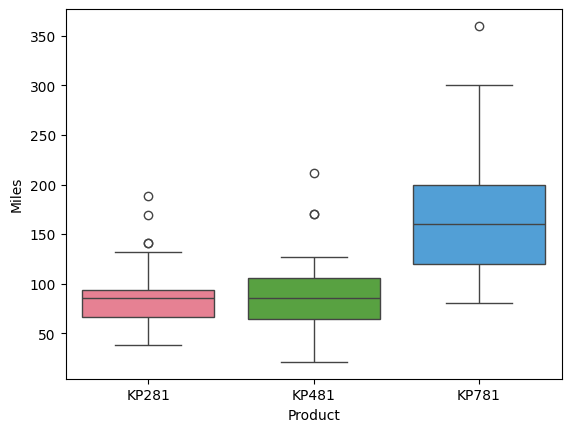

In [ ]:
sns.boxplot(data, x = data['Product'],y = data['Miles'],palette = 'husl')

<ipython-input-72-9e3906b125ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x = data['Product'],y = data['Miles'],palette = 'husl')


<Axes: xlabel='Product', ylabel='Miles'>

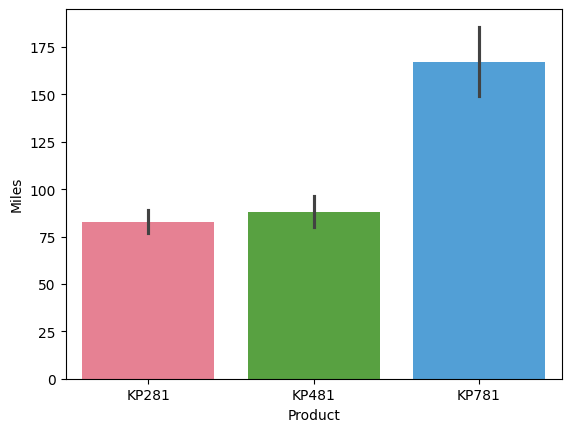

In [ ]:
sns.barplot(data, x = data['Product'],y = data['Miles'],palette = 'husl')

#### Insights :    
- Customers who run 60 - 100 miles per week preffered with KP281 treadmill, while the mid runners who run 60 - 120 miles per week preffered KP481 and the heavy runners who run 120 - 200 miles per week opt for KP781 treadmills.


## Distribution among customers based on Education

<ipython-input-75-b72473bd42c8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x = data['Product'],y = data['Education'],palette = 'husl')


<Axes: xlabel='Product', ylabel='Education'>

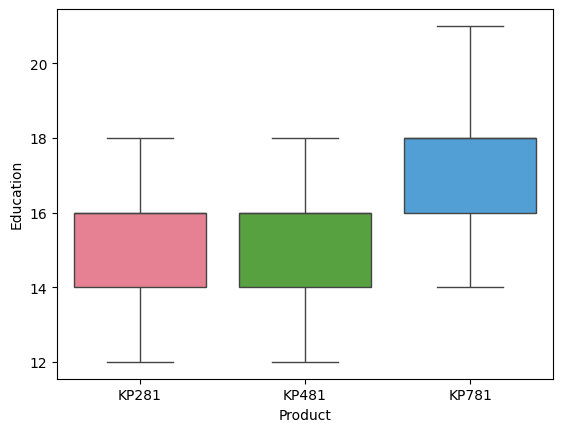

In [ ]:
sns.boxplot(data,x = data['Product'],y = data['Education'],palette = 'husl')

<ipython-input-76-b238f6290dbb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data,x = data['Product'],y = data['Education'],palette = 'husl')


<Axes: xlabel='Product', ylabel='Education'>

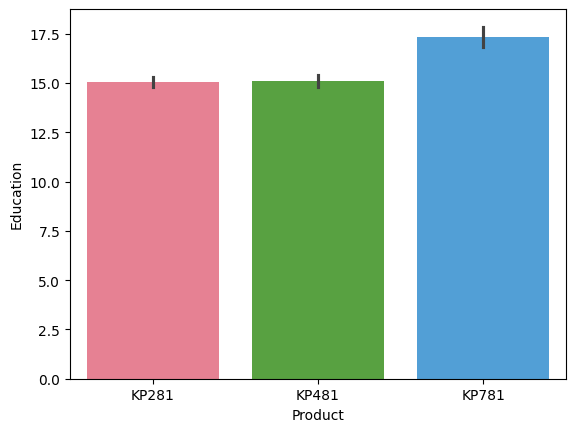

In [ ]:
sns.barplot(data,x = data['Product'],y = data['Education'],palette = 'husl')

#### Insights :     
- Customers with 14 - 16 years of education prefer the KP281 and KP481 treadmills.
- Among all the treadmills, the majority of customers with 16 - 18 years of education prefer the KP781 treadmill.

## Distribution of Usage across each Treadmill

<Axes: xlabel='Product', ylabel='count'>

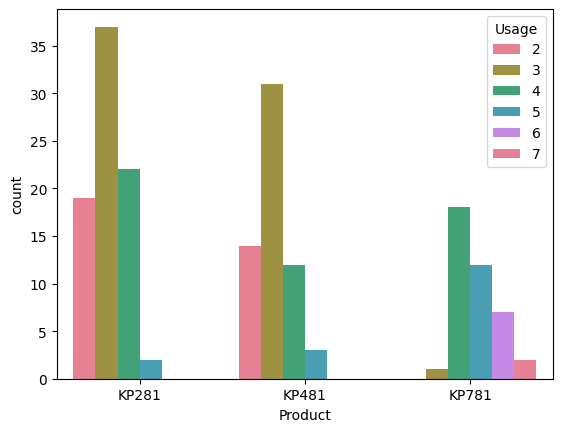

In [ ]:
sns.countplot(data, x = 'Product', hue = 'Usage',palette = 'husl')

#### Insights :    
- Customers who use treadmills 3 times per week prefer both KP281 and KP481.
-  However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.


## Distribution of Fitness across each Treadmill


<Axes: xlabel='Product', ylabel='count'>

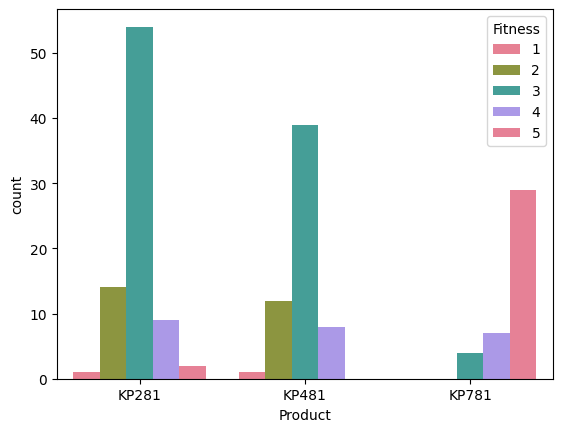

In [ ]:
sns.countplot(data, x = 'Product',hue = 'Fitness',palette = 'husl')

#### Insights :
- Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.

# Pairplots



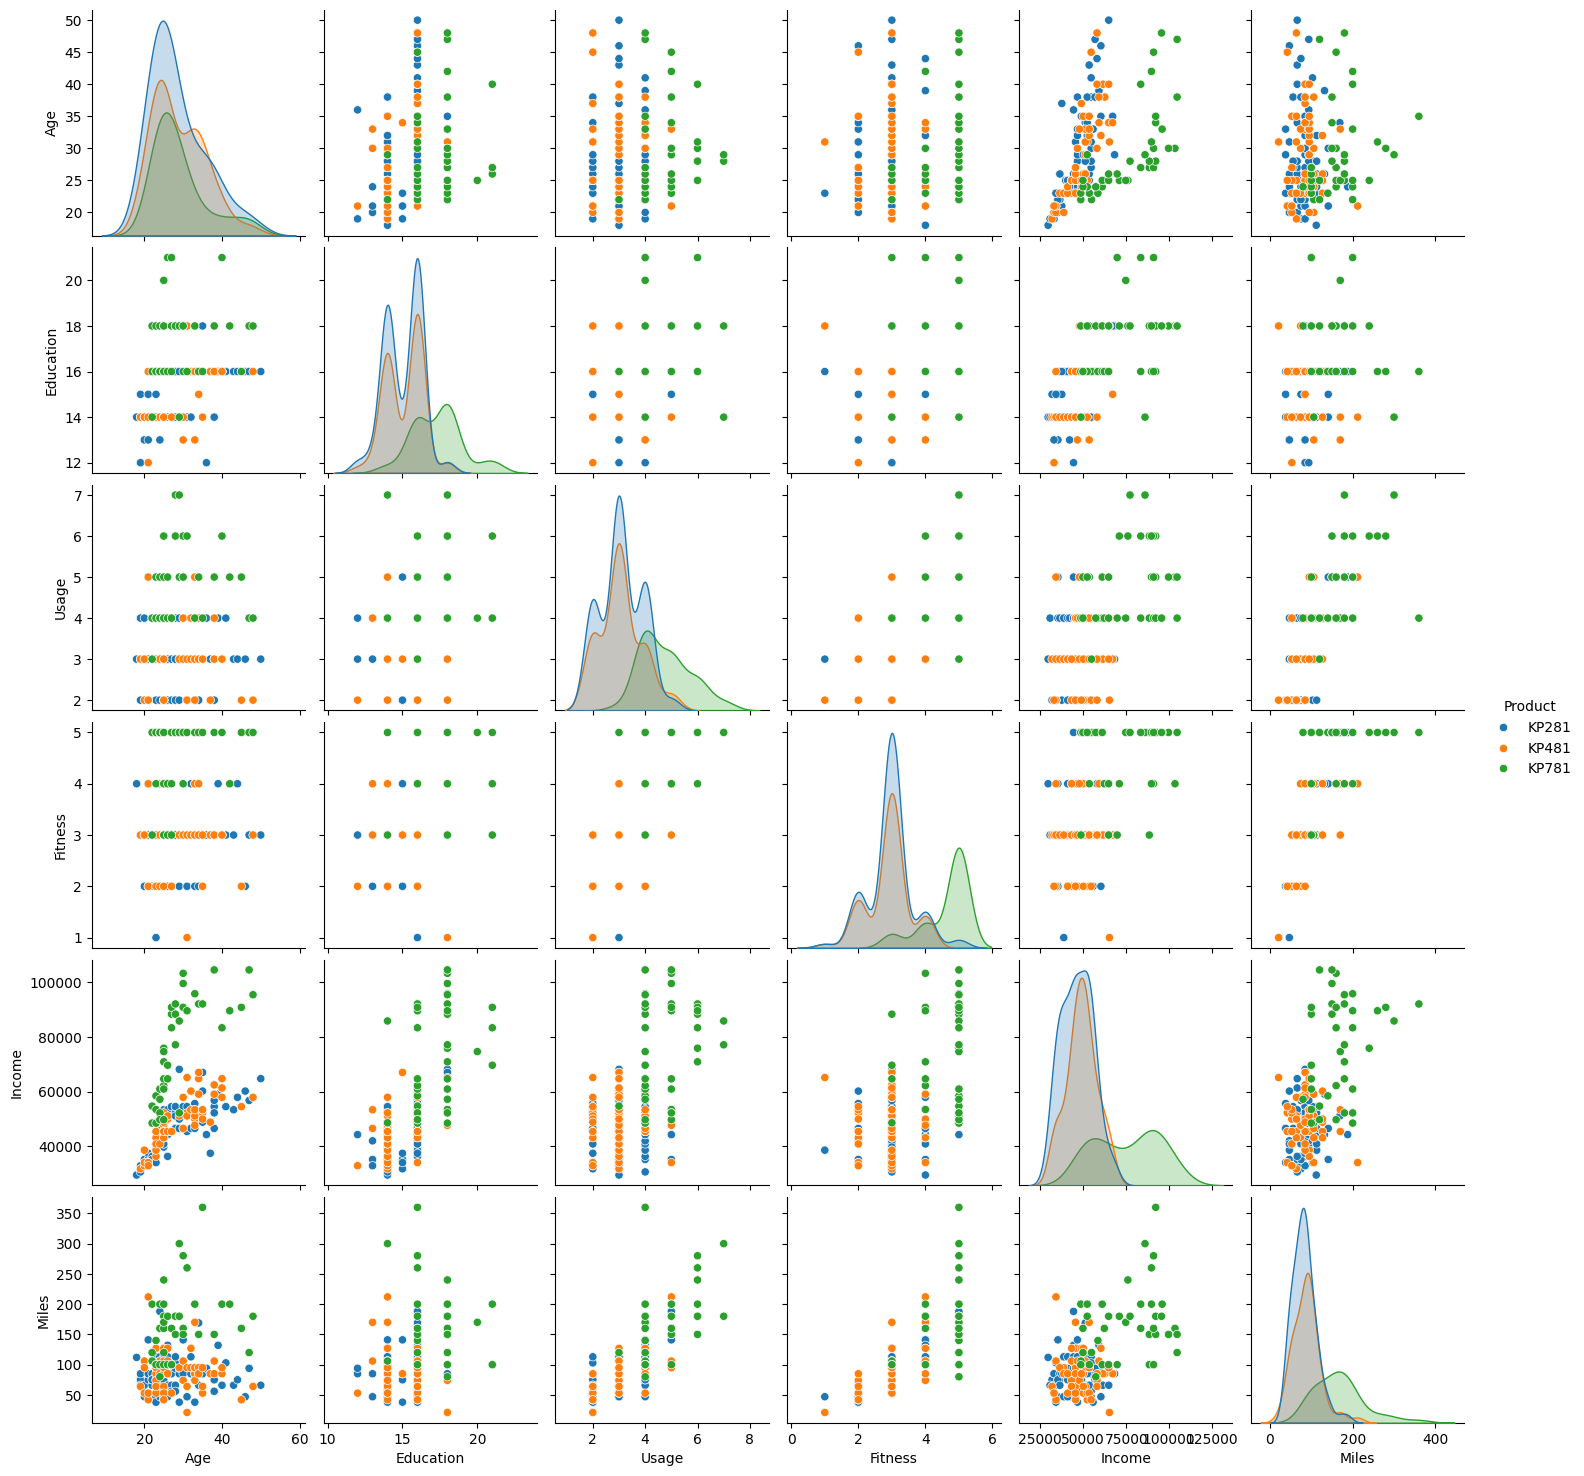

In [ ]:
sns.pairplot(data, hue = 'Product')

#### Insights :
- There is a positive correlation between age and income group.
- Customers with higher income tend to have higher education levels.
- Customers who use the treadmill more frequently tend to have higher fitness levels.
- Customers who run more miles per week tend to have higher fitness levels.
- There is no clear relationship between marital status and product preference.
- There is no clear relationship between generation and product preference.


# Heatmap

<ipython-input-97-98001e410f71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap = 'Purples',annot = True)


<Axes: >

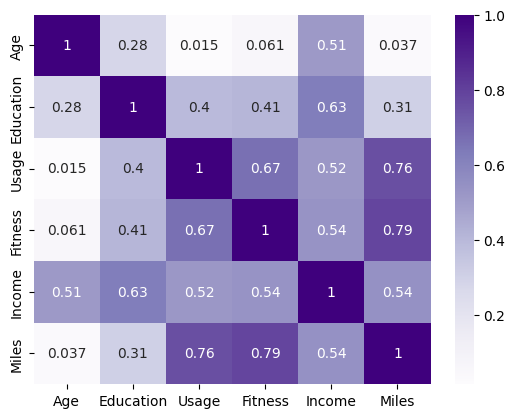

In [ ]:
sns.heatmap(data.corr(),cmap = 'Purples',annot = True)

#### Analysis :    
- **Age and Education :**
  There is a positive correlation between age and Education where as the age of a customer increases then the educational expeirence also increases.
- **Age and Income :**
  There is a moderate correlation between Age and Income. This suggests that customers' age increases, their income tends to be higher.
- **Usage and Fitness :**
  There is a string positive correlation of 0.67 between Usage and Fitness. This indicates that customers plan to use the treadmill more frequently tend to have higher fitness levels.
- **Age and Fitness :**
  There is a weak positive correlation of approximately 0.06 between Age and Fitness.
- **Fitness and Miles :**
  There is a strong positive correlation of approximately 0.79 betwee Fitness and Miles. This indicates that customers with higher fitness levels also expect to walk/run more miles per week.

# Conditional and Marginal Probabilities



## Impact of gender on purchasing the treadmill

In [ ]:
pd.crosstab(index = data['Product'],columns = data['Gender'],margins = True,margins_name = 'Total')

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


**Marginal Probabilities**
- P(KP281) = 80 /180 = 0.44
- P(KP481) = 60/180 = 0.33
- P(KP781) = 40/180 = 0.22
- P(MALE) = 104/180 = 0.58
- P(FEMALE) = 76/180 = 0.42


**Conditional Probabilities**

- P(KP281|Male) = 0.22
- P(KP281|Female) = 0.22
-P(KP481|Male) = 0.17
-P(KP481|Female) = 0.16
-P(KP781|Male) = 0.18
-P(KP781|Female)= 0.04


## IImpact of marital status on purchasing the Treadmill

In [ ]:
pd.crosstab(index = data[ 'Product' ],columns = data[ 'MaritalStatus'],margins = True,margins_name = 'TOTAL')

MaritalStatus,Partnered,Single,TOTAL
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
TOTAL,107,73,180


**Marginal Probablities**
- P(KP281)= 0.44
- P(KP481)= 0.33
- P(kP781)= 0.22

**Conditional Probabilities**
- P(KP281|Partnered) = 0.27
- P(KP281|Single) = 0.18
- P(KP481|Partnered) = 0.20
- P(KP481|Single) = 0.13
- P(KP781|Partnered) = 0.13
- P(KP781|Single)= 0.09

## Impact of Age groups on purchasing the treadmill

In [ ]:
pd.crosstab(index = data['Product'],columns = data['Generation'],margins=True,margins_name='Total')

Generation,Young,Middle_aged,Elderly,Total
Product,,,,
KP281,6,68,6,80
KP481,4,54,2,60
KP781,0,36,4,40
Total,10,158,12,180


**Age-groups :**

- 18 - 20 : Young
- 20 - 40: Middle-aged
- 40 - 50: Old

**Marginal Probablities**
- P(KP281)= 0.44
- P(KP481)= 0.33
- P(kP781)= 0.22
- P(Young)= 0.55
- P(Middle-aged)= 0.87
- P(Old)= 0.06

**Conditional Probablities:**
- P(KP281|Young) = 0.6
- P(KP281|Middle-aged) = 0.43
- P(KP281|Old) = 0.5
- P(KP481|Young) = 0.4
- P(KP481|Middle-aged) = 0.347
- P(KP481|Old) = 0.16
- P(KP781|Young) = 0
- P(KP781|Middle-aged) = 0.22
- P(KP781|Old) = 0.33



## Impact of Income groups on purchasing the treadmill

In [ ]:
pd.crosstab(index = data['Product' ],columns = data['Income_Group'],margins=True,margins_name='Total')

Income_Group,Category1,Category2,Category3,Total
Product,,,,
KP281,30,43,7,80
KP481,15,36,9,60
KP781,0,11,29,40
Total,45,90,45,180


**Income-groups :**
- 29000-50000 : Low (Category1)
- 51000-75000 : Medium (Category2)
- 76000-105000 : High (Category3)

**Marginal Probabilities :**
- P(KP281)= 0.44
- P(KP481)= 0.33
- P(kP781)= 0.22
- P(Low)= 0.25
- P(Medium)= 0.5
- P(High)= 0.25

**Conditional Probabilities :**
- P(KP281|Low) = 0.27
- P(KP281|Medium) = 0.18
- P(KP281|High) = 0.00
- P(KP481|Low) = 0.17
- P(KP481|Medium) = 0.17
- P(KP481|High)= 0.00
- P(KP781|Low) = 0.03
- P(KP781|Medium) = 0.08
- P(KP781|High)= 0.12


# ADDITIONAL QUESTIONS ON CONDITIONAL PROBABILITY

###What is the probability that a customer purchased a particular Trademill(KP281,KP481,KP781) and they run approximately 80 miles per week?


In [ ]:
total_length = len(data)
products = ['KP281','KP481','KP781']
miles = 80
probabilities = {}
for product in products:
  total_miles = len(data.loc[data['Miles'] == miles])
  total_product_miles = len(data.loc[(data['Product'] == product) & (data['Miles'] == miles)])
  conditional_probability = total_product_miles / total_miles
  probabilities[product] = conditional_probability

for product,probability in probabilities.items():
  print(f'Probability of customer purchased a {product} given that they runs a {miles} per week : {probability}')

Probability of customer purchased a KP281 given that they runs a 80 per week : 0.0
Probability of customer purchased a KP481 given that they runs a 80 per week : 0.0
Probability of customer purchased a KP781 given that they runs a 80 per week : 1.0


# Customer Profiling


## Potential Buyers for KP281 Treadmill

1. Gender: Male and Female
2. Marital status: Both Partnered or single
3. Age:18-29 as probablity of old customers purchasing the KP281 is low
4. Income:29000-50000 USD as probability of customers belonging to high income group
purchasing the KP281 treadmill is 0.
5. Education: 14-16 years
6. Fitness level':3
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 60-100 miles per week

## Potential Buyers for KP481 Treadmill

1. Gender : Both Male and Female
2. Marital status: Both Partnered or single
3. Age: 18-39 years
4. Income:29000-75000 USD as probability of customers belonging to high income group
purchasing the KP481 treadmill is 0.
5. Education: 14-16 years
6. Fitness level':3
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 80-120 miles per week --> Mostly midrunners.

## Potential Buyers for KP781 Treadmill

1. Gender: Only male customers as probablity of female customers buying KP781 is very low.
2. Marital status: Only married customers as probablity of single customers buying KP781 is also low.
3. Age: 18-39 years
4. Income:75000-105000 USD as probability of customers belonging to low and middle-income groups purchasing the KP781 treadmill is very low.
5. Education:16-18 years
6. Fitness level':5
7. Usage: use treadmill 3 times in a week
8. Miles: Runs 120 200 miles per week -> Mostly hardcore runners.

#INSIGHTS


1. KP281 is the most popular product among both male and female customers.
2. Female customers show a slightly higher preference for KP481 compared to male customers.
3. KP781 has a lower customer base among both genders, indicating a need to enhance its appeal or target specific customer segments.
4. Married customers have a higher frequency of purchasing all the treadmills compared to single customers.
5. The majority of the customers fall in the mid-aged category (20 - 40).
6. Majority of the mid-aged users chose KP281 as it is and entry level option.
7. Among the young and old aged also KP281 is the preffered one.
8. Customers belonging to category2 are the majority people to buy Aerofit products.
9. Customers belonging to low income group prefer KP281 due to it's affordability.
10. Customers belonging to middle income group prefer KP281 the most, then KP481 and then KP781.
11. Customers nelonging to the high income groups prefer KP781 the most and then KP481 and then KP281.
12. Customers who run 60 - 100 miles per week preffered with KP281 treadmill, while the mid runners who run 60 - 120 miles per week preffered KP481 and the heavy runners who run 120 - 200 miles per week opt for KP781 treadmills.
13. Customers with 14 - 16 years of education prefer the KP281 and KP481 treadmills.
14. Among all the treadmills, the majority of customers with 16 - 18 years of education prefer the KP781 treadmill.
15. Customers who use treadmills 3 times per week prefer both KP281 and KP481.
16. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.
17. Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.
18. There is a positive correlation between age and income group.
19. Customers with higher income tend to have higher education levels.
20. Customers who use the treadmill more frequently tend to have higher fitness levels.
21. Customers who run more miles per week tend to have higher fitness levels.
22. There is no clear relationship between marital status and product preference.
23. There is no clear relationship between generation and product preference.
24. There is a positive correlation between age and Education.
25. There is a moderate correlation between Age and Income.
26. There is a string positive correlation of 0.67 between Usage and Fitness.
27. There is a weak positive correlation of approximately 0.06 between Age and Fitness.
28. There is a strong positive correlation of approximately 0.79 betwee Fitness and Miles.
29. The probability of a customer purchasing a KP281 given that they run approximately 80 miles per week is 0.2857.
30. The probability of a customer purchasing a KP481 given that they run approximately 80 miles per week is 0.1429.
31. Probability of customer purchased a KP781 given that they runs a 80 per week is 1.0


# Recommendations

1. **Target mid-aged customers:** Focus marketing efforts on the 20-40 age group, as they represent the majority of customers and have a high purchasing frequency.
2. **Promote KP281 as an entry-level option:** Emphasize the affordability and accessibility of the KP281 treadmill to attract customers from various income groups.
3. **Highlight the features of KP481 for female customers:** Customize marketing messages for female customers, highlighting the specific benefits and features of the KP481 treadmill that appeal to their needs and preferences.
4. **Enhance the appeal of KP781:** Conduct market research to understand why customers prefer other models over the KP781 and make necessary improvements to enhance its appeal and competitiveness.
5. **Offer incentives for married couples:** Create promotional offers or discounts that encourage married couples to purchase treadmills, considering their higher purchasing frequency.
6. **Target customers with higher income:** Develop strategies to attract customers from higher income groups, as they show a preference for the more advanced KP781 treadmill.
7. **Provide financing options:** Offer flexible financing options to make treadmills more accessible to customers with lower incomes.
8. **Promote treadmills for runners:** Emphasize the benefits of Aerofit treadmills for runners of various levels, highlighting the durability and performance features that cater to their needs.
9. **Educate customers about the benefits of exercise:** Create content and resources that educate customers about the importance of regular exercise and how Aerofit treadmills can help them achieve their fitness goals.
10. **Partner with fitness influencers:** Collaborate with fitness influencers or bloggers to promote Aerofit treadmills and showcase their features and benefits to a wider audience.
11. **Optimize online presence:** Ensure that the Aerofit website and social media channels provide comprehensive information about the products, customer reviews, and purchasing options.
12. **Personalize marketing messages:** Collect customer data and use it to personalize marketing messages based on demographics, purchase history, and preferences.
13. **Offer trial periods or demos:** Allow potential customers to try out Aerofit treadmills before purchasing to build confidence and reduce purchase hesitation.
14. **Host fitness events or challenges:** Organize fitness events or challenges that encourage customers to use Aerofit treadmills and share their experiences.
15. **Provide excellent customer service:** Ensure that customers have a positive experience throughout the purchasing process and beyond, by offering responsive and helpful customer support.
16. **Collect and analyze customer feedback:** Regularly gather customer feedback to identify areas for improvement and make necessary adjustments to products and services.
17. **Monitor market trends:** Stay updated on industry trends, competitor activities, and customer preferences to ensure that Aerofit treadmills remain competitive and relevant.
18. **Invest in research and development:** Continuously innovate and develop new features and models to meet the evolving needs and expectations of customers.
19. **Expand product offerings:** Consider expanding the product line to include accessories or complementary products that enhance the customer experience.
20. **Build brand loyalty:** Implement loyalty programs or referral incentives to encourage repeat purchases and positive word-of-mouth marketing.

**Actionable Insight : The probability of female customers buying each of the treadmills compared to male customers is 42%.**
1. Create targeted advertiesements and promistions appeal to women, shiwcasing how fitness can positively impact their lives.
2. Offer a diverse selection of treadmill models to cater various fitness levels and performance.

# Note to evaluator
- **colab link** : https://colab.research.google.com/drive/1x1FolsO30lgwvBHZLXCnkPSSzUZcFzht?usp=sharing
- Student Name = Sai Venkatesh
- Converted to pdf using [https://2pdf.com/convert-ipynb-to-pdf/](https://2pdf.com/convert-ipynb-to-pdf/)